(194, 260, 3)
22564
1
1
1
0
0
1
0
0
1
0


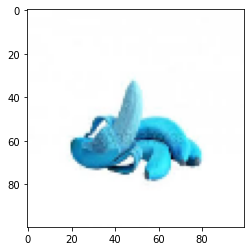

In [4]:
import pickle
import random
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2

DATADIR = '/kaggle/input/waste-classification-data/dataset/DATASET/TRAIN'
CATEGORIES = ['O', 'R']

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # path to O or R dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array, cmap='gray')
        # plt.show()
        break
    break

print(img_array.shape)

IMG_SIZE = 100                             
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
# plt.show()

training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # path to O or R dir
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE), 3)
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()

print(len(training_data))

random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])

X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3) # 1: because it is grayscale

pickle_out = open('X.pickle', 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open('y.pickle', 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()


In [5]:
!ls

X.pickle  __notebook_source__.ipynb  y.pickle


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import tensorflow as tf
import pickle
import time
import numpy as np


pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

X = X/255.0

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)

y = np.array(y)

dense_layers = [0]
layer_sizes = [64]
conv_layers = [3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(
                conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))
                model.add(Dropout(0.5))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))
#             print('came here')
            opt = tf.keras.optimizers.Adam(learning_rate=0.001)

            model.compile(loss='binary_crossentropy',
                            optimizer=opt,
                            metrics=['accuracy'])
            print('came here')
            model.fit(X, y,
                        batch_size=32,
                        epochs=10,
                        validation_split=0.2)

model.save('64x3-CNN.model')

3-conv-64-nodes-0-dense-1590784104
came here
Train on 18051 samples, validate on 4513 samples
Epoch 1/10
18051/18051 [==============================] - 14s 786us/sample - loss: 0.4348 - accuracy: 0.8092 - val_loss: 0.3950 - val_accuracy: 0.8276
Epoch 2/10
18051/18051 [==============================] - 9s 486us/sample - loss: 0.3772 - accuracy: 0.8385 - val_loss: 0.3583 - val_accuracy: 0.8467
Epoch 3/10
18051/18051 [==============================] - 9s 473us/sample - loss: 0.3507 - accuracy: 0.8554 - val_loss: 0.3390 - val_accuracy: 0.8597
Epoch 4/10
18051/18051 [==============================] - 8s 470us/sample - loss: 0.3306 - accuracy: 0.8633 - val_loss: 0.3312 - val_accuracy: 0.8602
Epoch 5/10
18051/18051 [==============================] - 8s 458us/sample - loss: 0.3128 - accuracy: 0.8706 - val_loss: 0.3730 - val_accuracy: 0.8382
Epoch 6/10
18051/18051 [==============================] - 9s 475us/sample - loss: 0.2937 - accuracy: 0.8803 - val_loss: 0.3175 - val_accuracy: 0.8664
Epoch

Using TensorFlow backend.


Testing set size :  2513
x_test shape: (2513,)
y_test shape: (2513,)
Test set shape :  (2513, 100, 100, 3)


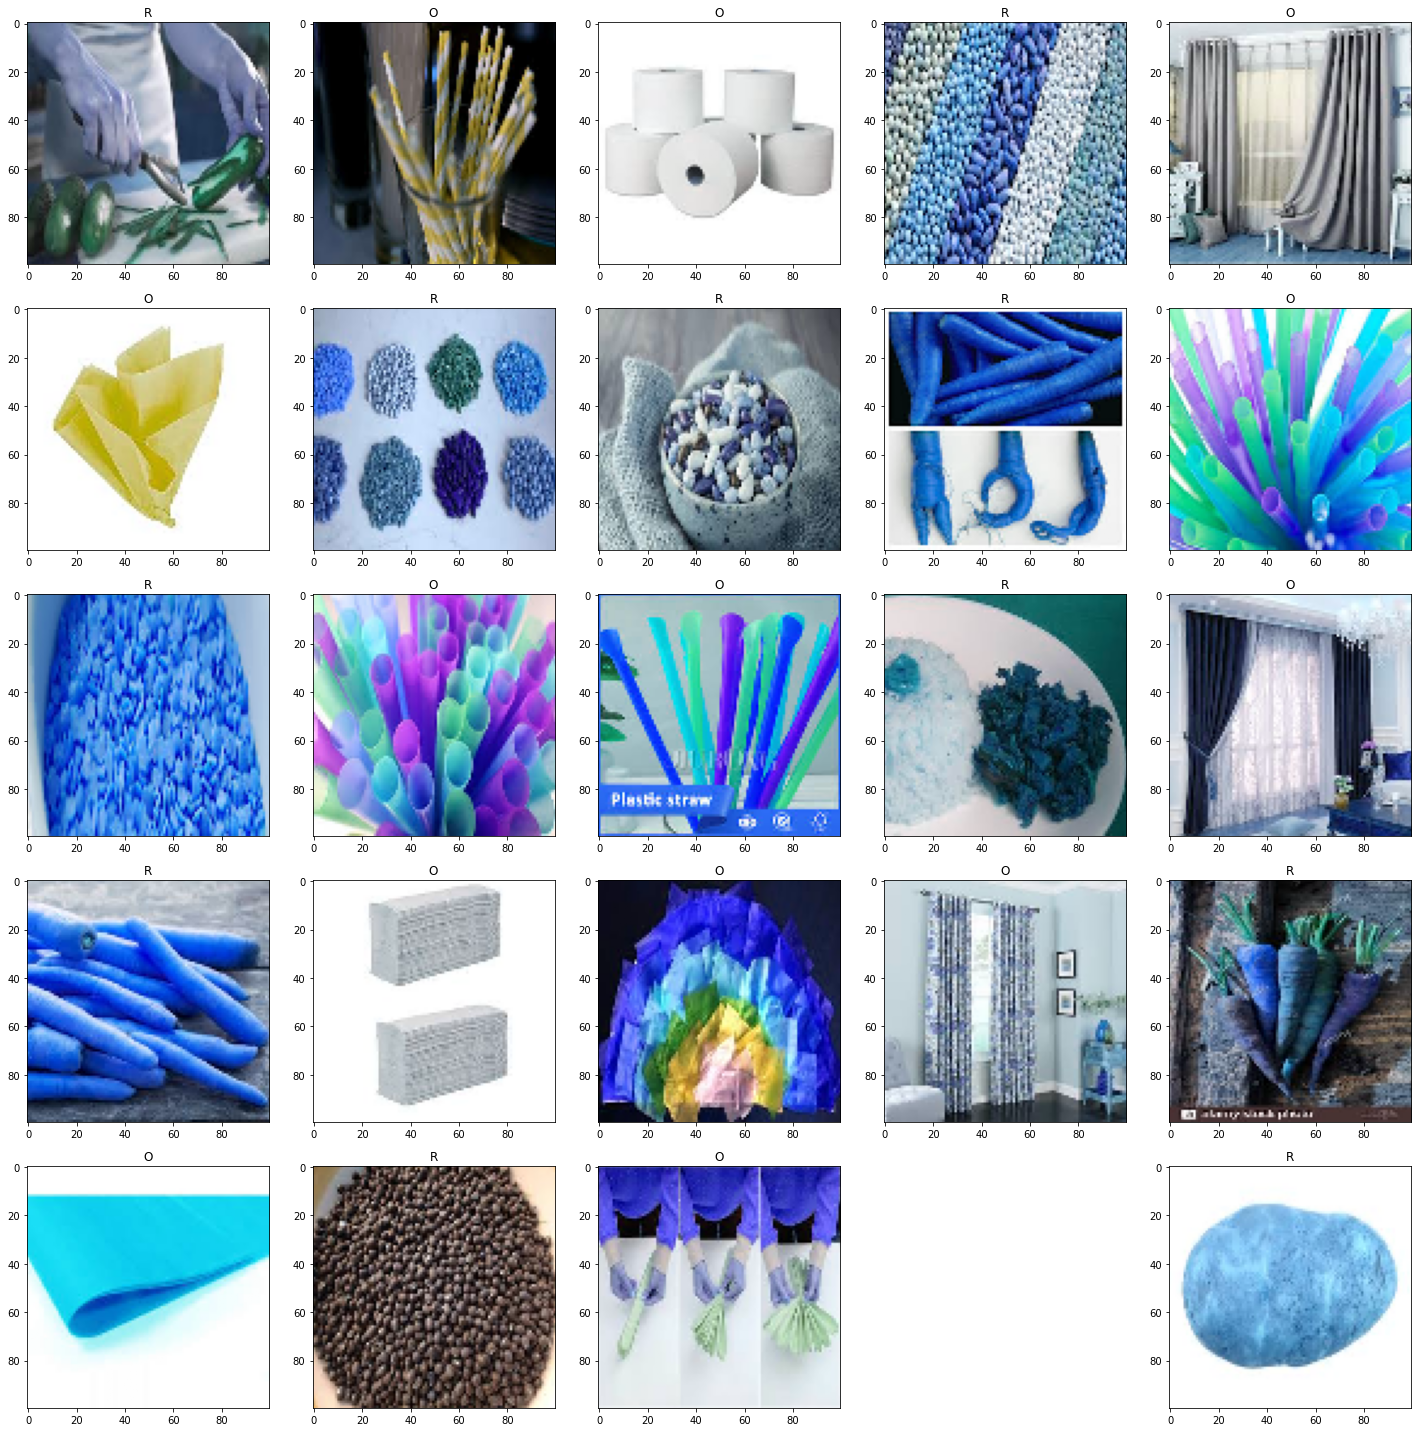

In [7]:
e=(20,20))
classes = ['R','O']
for i in range(1,26):
    index = np.random.randint(x_test.shape[0])
    plt.subplot(5, 5, i)
    plt.imshow(np.squeeze(x_test[index]), cmap='cool')
    plt.title(classes[int(y_test[index])])
    plt.tight_layout()
plt.show()       from keras.models import Sequential
from keras.layers import Conv2D, Activation,Dropout
from keras.models import Model,load_model
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers.core import Flatten, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.engine.topology import Layer
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_files
import itertools
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import itertools

# train_dir = '/kaggle/input/waste-classification-data/dataset/DATASET/TRAIN'
test_dir = '/kaggle/input/waste-classification-data/dataset/DATASET/TEST'

def load_dataset(path):
    data = load_files(path) #load all files from the path
    files = np.array(data['filenames']) #get the file  
    targets = np.array(data['target'])#get the the classification labels as integer index
    target_labels = np.array(data['target_names'])#get the the classification labels 
    return files,targets,target_labels
    
# x_train, y_train,target_labels = load_dataset(train_dir)
x_test, y_test,_ = load_dataset(test_dir)

# print('Training set size : ' , x_train.shape[0])
print('Testing set size : ', x_test.shape[0])

# x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 1)

# print ("x_train shape: " + str(x_train.shape))
# print ("x_train shape: " + str(y_train.shape))
# print ("x_validate shape: " + str(x_validate.shape))
# print ("y_validate shape: " + str(y_validate.shape))
print ("x_test shape: " + str(x_test.shape))
print ("y_test shape: " + str(y_test.shape))

def convert_image_to_array(files):
    width, height, channels = 100, 100, 3
    images_as_array = np.empty((files.shape[0], width, height, channels), dtype=np.uint8) #define train and test data shape
    for idx,file in enumerate(files):
        img = cv2.imread(file) 
        res = cv2.resize(img, dsize=(width, height), interpolation=cv2.INTER_CUBIC) #As images have different size, resizing all images to have same shape of image array
        images_as_array[idx] = res
    return images_as_array

# x_train = np.array(convert_image_to_array(x_train))
# print('Training set shape : ',x_train.shape)

# x_valid = np.array(convert_image_to_array(x_validate))
# print('Validation set shape : ',x_valid.shape)

x_test = np.array(convert_image_to_array(x_test))
print('Test set shape : ',x_test.shape)

# x_train = x_train.astype('float32')/255
# x_valid = x_valid.astype('float32')/255
x_test = x_test.astype('float32')/255
# y_train = y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)
# y_validate = y_validate.reshape(y_validate.shape[0],1)

plt.figure(figsize=(20,20))
classes = ['R','O']
for i in range(1,26):
    index = np.random.randint(x_test.shape[0])
    plt.subplot(5, 5, i)
    plt.imshow(np.squeeze(x_test[index]), cmap='cool')
    plt.title(classes[int(y_test[index])])
    plt.tight_layout()
plt.show()                                                                                  

Test Loss : 0.3050767343166669
Test Accuracy : 0.90608835


Text(0.5, 17.25, 'Predicted label')

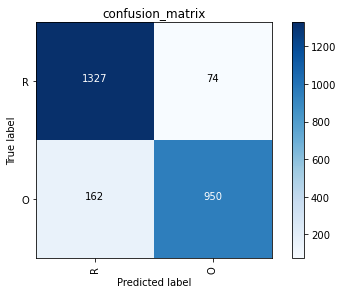

In [8]:
import pickle
import matplotlib.pyplot as plt

# model = load_model('cnn.hdf5')
# model.load_weights('cnn.hdf5')

score = model.evaluate(x_test,y_test,verbose=0)
print('Test Loss :',score[0])
print('Test Accuracy :',score[1])

#get the predictions for the test data
predicted_classes = model.predict_classes(x_test)

confusion_mtx = confusion_matrix(y_test, predicted_classes) 

plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('confusion_matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['R','O'], rotation=90)
plt.yticks(tick_marks, ['R','O'])
#Following is to mention the predicated numbers in the plot and highligh the numbers the most predicted number for particular label
thresh = confusion_mtx.max() / 2.
for i, j in itertools.product(range(confusion_mtx.shape[0]), range(confusion_mtx.shape[1])):
    plt.text(j, i, confusion_mtx[i, j],
    horizontalalignment="center",
    color="white" if confusion_mtx[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')